# **MixTransformer Class**
OS = Linux <br/>
Complete Backbone Documentation: https://keras.io/api/keras_cv/models/backbones

In [1]:
import tensorflow as tf
import keras_cv.models
from tensorflow.keras.utils import plot_model
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.models import Model

2024-08-06 18:50:23.899152: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-06 18:50:23.899943: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-06 18:50:23.907145: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-06 18:50:23.916992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 18:50:23.930030: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

### Loading architecture and weights from preset

In [2]:
model = keras_cv.models.MiTBackbone.from_preset(
    "mit_b1",
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 617/617 [00:00<00:00, 1.55MB/s]


In [3]:
model.summary()

Model: "mi_t_backbone"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ patch_and_embed_0               │ (None, 3136, 64)       │         9,600 │
│ (OverlappingPatchingAndEmbeddi… │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hierarchical_encoder_0_0        │ (None, 3136, 64)       │       314,880 │
│ (HierarchicalTransformerEncode… │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hierarchical_encoder_0_1        │ (None, 3136, 64)       │       314,880 │
│ (HierarchicalTransformerEncode… │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_7           │ (None, 3136, 64)       │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_level_0 (Reshape)        │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ patch_and_embed_1               │ (None, 784, 128)       │        74,112 │
│ (OverlappingPatchingAndEmbeddi… │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hierarchical_encoder_1_0        │ (None, 784, 128)       │       465,920 │
│ (HierarchicalTransformerEncode… │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hierarchical_encoder_1_1        │ (None, 784, 128)       │       465,920 │
│ (HierarchicalTransformerEncode… │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_15          │ (None, 784, 128)       │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_level_1 (Reshape)        │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ patch_and_embed_2               │ (None, 196, 320)       │       369,600 │
│ (OverlappingPatchingAndEmbeddi… │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hierarchical_encoder_2_0        │ (None, 196, 320)       │     1,656,320 │
│ (HierarchicalTransformerEncode… │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hierarchical_encoder_2_1        │ (None, 196, 320)       │     1,656,320 │
│ (HierarchicalTransformerEncode… │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_23          │ (None, 196, 320)       │           640 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_level_2 (Reshape)        │ (None, 14, 14, 320)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ patch_and_embed_3               │ (None, 49, 512)        │     1,476,096 │
│ (OverlappingPatchingAndEmbeddi… │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 13,151,424 (50.17 MB)

 Trainable params: 13,151,424 (50.17 MB)

 Non-trainable params: 0 (0.00 B)

## **Activation Maps**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


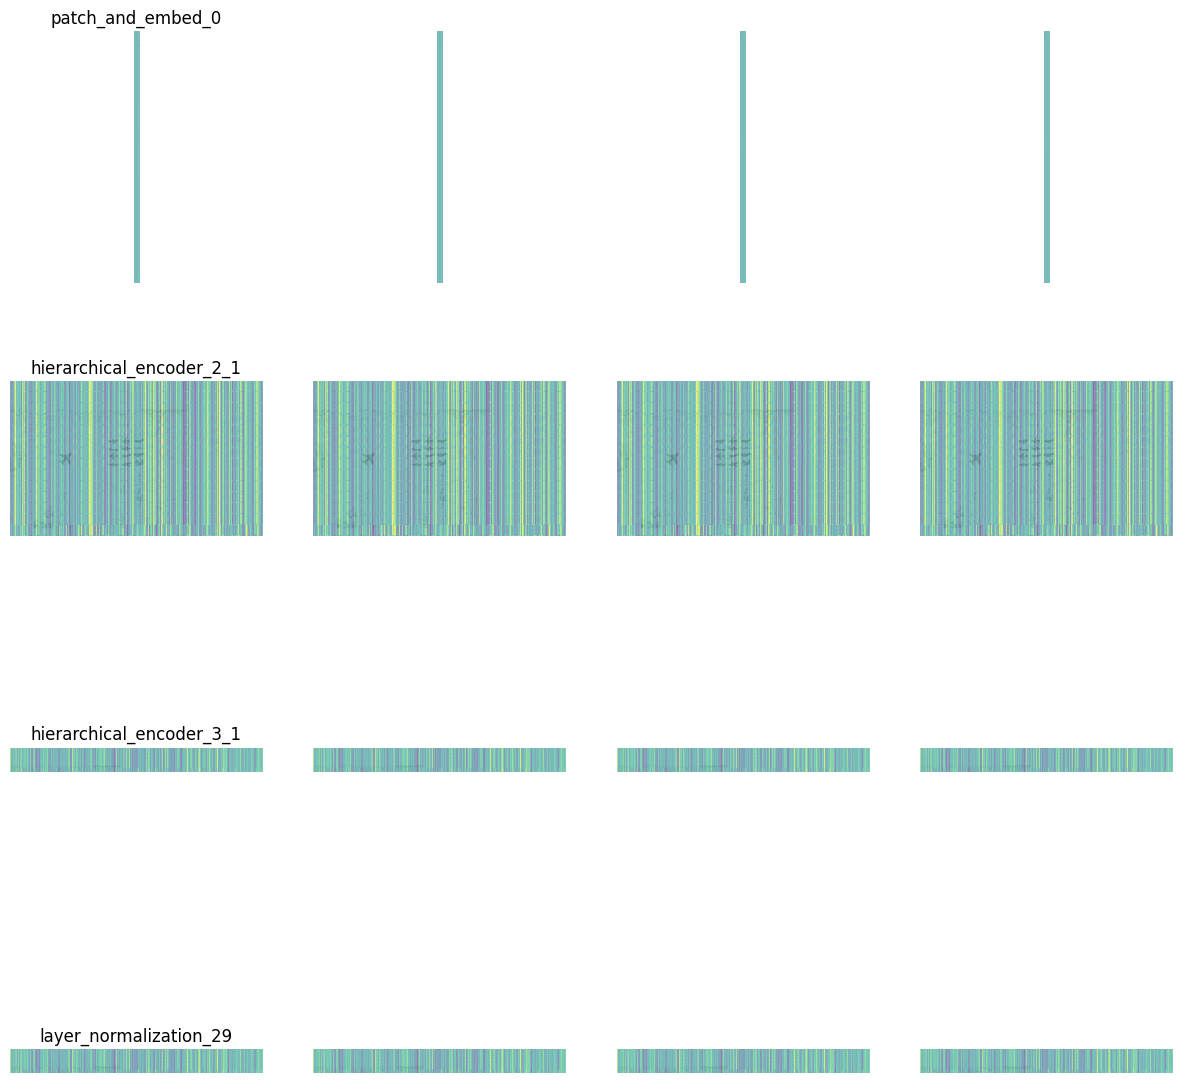

In [7]:
def load_image(img_path, target_size=(224, 224)):
    img = Image.open(img_path).convert('RGB')  # Convert to RGB to ensure 3 channels
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

image_path = 'data/illustrator_4.jpg'  # Replace with your image path
input_image = load_image(image_path)


# Pass the image through the model
features = model(input_image)

# Create a model that gives outputs of all intermediate layers
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Get the activations for the input image
activations = activation_model.predict(input_image)

def display_activation_maps(activations, input_img, layer_names, n_cols=4):
    n_rows = len(activations)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
    
    for i, (activation, layer_name) in enumerate(zip(activations, layer_names)):
        num_filters = activation.shape[-1]
        for col in range(n_cols):
            filter_index = col
            if filter_index < num_filters:
                if activation.ndim == 4:
                    activation_img = activation[0, :, :, filter_index]
                else:
                    activation_img = activation[0, :, :]
                
                activation_img -= activation_img.mean()
                activation_img /= activation_img.std()
                activation_img *= 64
                activation_img += 128
                activation_img = np.clip(activation_img, 0, 255).astype('uint8')
                
                ax = axes[i, col]
                ax.imshow(input_img)
                ax.imshow(activation_img, cmap='viridis', alpha=0.6)
                ax.axis('off')
                
        # Set layer name as the title for the first column of each row
        axes[i, 0].set_title(layer_name)
    
    plt.show()

# intermediate outputs
layer_names = ['patch_and_embed_0', 'hierarchical_encoder_2_1', 'hierarchical_encoder_3_1', 'layer_normalization_29']  # Filter for convolutional layers
intermediate_model = Model(inputs=model.input, outputs=[model.get_layer(name).output for name in layer_names])

# Get the activations for the input image
activations = intermediate_model.predict(input_image)

# Visualize the activation maps
input_img = np.array(Image.open(image_path).resize((224, 224)))
display_activation_maps(activations, input_img, layer_names)